In [2]:
import pandas as pd
import numpy as np

## Data Cleaning

In [3]:
#reads in data.csv
spotify = pd.read_csv("data.csv")
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [4]:
grammy = pd.read_csv("the_grammy_awards.csv")
grammy.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


In [5]:
spotify.shape

(174389, 19)

In [6]:
grammy.shape

(4810, 10)

In [7]:
# limit years for 1990-2019
spotify = spotify.loc[spotify.year >= 1990]
spotify = spotify.loc[spotify.year <= 2019]
spotify.shape

(56565, 19)

In [8]:
# unique names for artists who won a grammy
grammy_artists = grammy['artist'].unique()
grammy_artists

array(['Billie Eilish', 'Bon Iver', 'Ariana Grande', ..., 'The Champs',
       'Stan Freberg',
       'David Seville And The Chipmunks (Ross Bagdasarian, Sr.)'],
      dtype=object)

In [9]:
# determine if an artist won a grammy 
def is_grammy(artist):
    artist_list = artist.replace('[', '').replace(']', '').replace("'", '').replace("'", '').split(', ')
    for i in artist_list:
        if i in grammy_artists: 
            return 1          
    return 0

In [10]:
# add column where 1 if artist won a grammy
spotify['grammy_winner'] = spotify['artists'].apply(is_grammy)
spotify

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,grammy_winner
9071,0.39400,['Gerry & The Pacemakers'],0.484,160187,0.265,0,6catF1lDhNTjjGa2GxRQNN,0.000000,0,0.1490,-11.101,1,You'll Never Walk Alone - Mono; 2002 Remaster,55,2008-02-11,0.0322,113.564,0.285,2008,0
9081,0.25500,['Gerry & The Pacemakers'],0.405,141987,0.365,0,4aSw1QJIMwYSoDEgzgdCJL,0.000005,6,0.1630,-10.226,0,Ferry Cross the Mersey - Mono; 2002 Remaster,39,2008-02-11,0.0289,104.536,0.588,2008,0
9085,0.40600,['Gerry & The Pacemakers'],0.477,157093,0.352,0,0ZMMtH875IR2TfkyC4PolD,0.000000,1,0.1220,-14.165,1,Don't Let the Sun Catch You Crying (Main) - Mono,34,2008-02-11,0.0300,106.773,0.478,2008,0
9087,0.88700,['Frank Sinatra'],0.319,187333,0.201,0,1hx7X9cMXHWJjknb9O6Ava,0.000000,7,0.9040,-17.796,1,The September Of My Years - Live At The Sands ...,27,2018-05-04,0.0623,117.153,0.239,2018,1
9091,0.93800,['Frank Sinatra'],0.269,236800,0.129,0,19oquvXf3bc65GSqtPYA5S,0.000005,7,0.6830,-18.168,0,It Was A Very Good Year - Live At The Sands Ho...,26,2018-05-04,0.0576,82.332,0.160,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174116,0.01380,['Workout Music '],0.734,277493,0.809,0,4ZzfKwqPfy02fpQxuh9Zz3,0.012600,0,0.0635,-5.655,0,RITMO (Bay Boys For Life) [Remix],14,2019-12-26,0.1150,128.015,0.965,2019,0
174118,0.06540,['Workout Music '],0.533,287987,0.879,0,3O1lskEk6MF8bEQ76Q7Cmv,0.000000,5,0.0147,-3.736,1,Beautiful People (Remix),14,2019-12-26,0.0492,129.943,0.398,2019,0
174120,0.00358,['Workout Music '],0.764,268120,0.828,0,4fBQiIB6X7sE5RWK7mZq8N,0.005500,2,0.0763,-3.625,1,Tusa (Remix),16,2019-12-26,0.0810,127.994,0.931,2019,0
174124,0.98100,['October'],0.520,226603,0.198,0,1g6Zm6BiN3WktHGzu0ZKAh,0.909000,1,0.1020,-23.823,1,A Good Year - 2020 Remastered,5,2013,0.0483,123.976,0.272,2013,0


In [11]:
# drop columns that aren't useful
spotify = spotify.drop(columns=['artists', 'id', 'release_date', 'year'])
spotify

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,grammy_winner
9071,0.39400,0.484,160187,0.265,0,0.000000,0,0.1490,-11.101,1,You'll Never Walk Alone - Mono; 2002 Remaster,55,0.0322,113.564,0.285,0
9081,0.25500,0.405,141987,0.365,0,0.000005,6,0.1630,-10.226,0,Ferry Cross the Mersey - Mono; 2002 Remaster,39,0.0289,104.536,0.588,0
9085,0.40600,0.477,157093,0.352,0,0.000000,1,0.1220,-14.165,1,Don't Let the Sun Catch You Crying (Main) - Mono,34,0.0300,106.773,0.478,0
9087,0.88700,0.319,187333,0.201,0,0.000000,7,0.9040,-17.796,1,The September Of My Years - Live At The Sands ...,27,0.0623,117.153,0.239,1
9091,0.93800,0.269,236800,0.129,0,0.000005,7,0.6830,-18.168,0,It Was A Very Good Year - Live At The Sands Ho...,26,0.0576,82.332,0.160,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174116,0.01380,0.734,277493,0.809,0,0.012600,0,0.0635,-5.655,0,RITMO (Bay Boys For Life) [Remix],14,0.1150,128.015,0.965,0
174118,0.06540,0.533,287987,0.879,0,0.000000,5,0.0147,-3.736,1,Beautiful People (Remix),14,0.0492,129.943,0.398,0
174120,0.00358,0.764,268120,0.828,0,0.005500,2,0.0763,-3.625,1,Tusa (Remix),16,0.0810,127.994,0.931,0
174124,0.98100,0.520,226603,0.198,0,0.909000,1,0.1020,-23.823,1,A Good Year - 2020 Remastered,5,0.0483,123.976,0.272,0


In [12]:
from string import punctuation

# function to make text lowercase, remove punctuation and digits

def custom_cleaner(text):
    lowercase = text.lower()
    no_punct = ''.join([character for character in lowercase if character not in punctuation])
    no_digit = ''.join([character for character in no_punct if not character.isdigit()])
    return no_digit

In [13]:
spotify['name'] = spotify['name'].apply(custom_cleaner)

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/kyrawong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
from nltk.tokenize import word_tokenize

# tokenize text

spotify['name'] = spotify['name'].apply(word_tokenize)

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words

# function to remove stopwords

def remove_stopwords(text):
    words = [word for word in text if not word in stop_words]
    return words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyrawong/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
spotify['name'] = spotify['name'].apply(remove_stopwords)

In [18]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()

# function to do stemming

def stemmer(text):
    stemmed_text = [porter.stem(word) for word in text]
    return stemmed_text

In [19]:
spotify['name'] = spotify['name'].apply(stemmer)

In [20]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

# detokenize text

names = spotify['name'].apply(TreebankWordDetokenizer().detokenize)
names

9071                     youll never walk alon mono remast
9081                        ferri cross mersey mono remast
9085                      dont let sun catch cri main mono
9087      septemb year live sand hotel casino la vega show
9091         good year live sand hotel casino la vega show
                                ...                       
174116                            ritmo bay boy life remix
174118                                  beauti peopl remix
174120                                          tusa remix
174124                                    good year remast
174128                        new year eve ultim countdown
Name: name, Length: 56565, dtype: object

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# document-term matrix for body

countvec = CountVectorizer(min_df=0.0015)

sparse_dtm = countvec.fit_transform(names)

dtm = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=spotify.index)

frequencies = dtm.sum().sort_values(ascending=False)
frequencies[:20]

mix        3100
remast     3007
year       2954
feat       1844
love       1774
remix      1681
live       1512
version    1450
origin     1327
la          866
new         833
de          803
edit        747
cut         645
time        626
radio       613
dont        613
one         610
el          610
like        570
dtype: int64

In [22]:
dtm.drop(columns=['remix', 'live', 'mix', 'remast', 'year', 'version', 'feat', 'origin', 'edit', 'radio', 'cut'], inplace=True)
dtm

,acoust,aint,alon,alway,amor,angel,anoth,anthem,around,asot,...,white,wish,without,woman,wonder,world,ya,yo,young,your
9071,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
174124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data = pd.concat([spotify, dtm], axis =1)
data

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,white,wish,without,woman,wonder,world,ya,yo,young,your
9071,0.39400,0.484,160187,0.265,0,0.000000,0,0.1490,-11.101,1,...,0,0,0,0,0,0,0,0,0,0
9081,0.25500,0.405,141987,0.365,0,0.000005,6,0.1630,-10.226,0,...,0,0,0,0,0,0,0,0,0,0
9085,0.40600,0.477,157093,0.352,0,0.000000,1,0.1220,-14.165,1,...,0,0,0,0,0,0,0,0,0,0
9087,0.88700,0.319,187333,0.201,0,0.000000,7,0.9040,-17.796,1,...,0,0,0,0,0,0,0,0,0,0
9091,0.93800,0.269,236800,0.129,0,0.000005,7,0.6830,-18.168,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174116,0.01380,0.734,277493,0.809,0,0.012600,0,0.0635,-5.655,0,...,0,0,0,0,0,0,0,0,0,0
174118,0.06540,0.533,287987,0.879,0,0.000000,5,0.0147,-3.736,1,...,0,0,0,0,0,0,0,0,0,0
174120,0.00358,0.764,268120,0.828,0,0.005500,2,0.0763,-3.625,1,...,0,0,0,0,0,0,0,0,0,0
174124,0.98100,0.520,226603,0.198,0,0.909000,1,0.1020,-23.823,1,...,0,0,0,0,0,0,0,0,0,0


In [52]:
column_numbers = [x for x in range(data.shape[1])]
column_numbers.remove(10)
data = data.iloc[:, column_numbers]

In [53]:
data['head']

9071      0
9081      0
9085      0
9087      0
9091      0
         ..
174116    0
174118    0
174120    0
174124    0
174128    0
Name: head, Length: 56565, dtype: int64

In [54]:
# split into train and test sets

from sklearn.model_selection import train_test_split

y = data['popularity']
X = data.drop(['popularity'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=88)
X_train.shape, X_test.shape

((39595, 264), (16970, 264))

## Model Building

### Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

ols = LinearRegression().fit(X_train, y_train)

### Regression Tree w/ CV

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)

cv = KFold(n_splits=5,random_state=1,shuffle=True) 

dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=cv, verbose=0)
dtr_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')

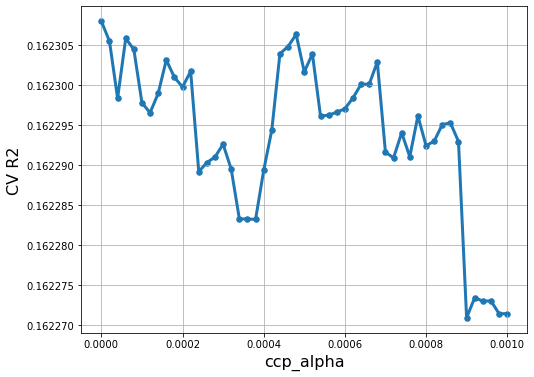

In [60]:
import matplotlib.pyplot as plt

ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')

plt.show()

In [61]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.0}


### Calculating OSR2 & MAE

In [66]:
# Calculating OSR2 for both models

OSR2_ols = ols.score(X_test, y_test)
OSR2_dtr = dtr_cv.score(X_test, y_test)

print('OSR2 for linear regression model: ' + str(OSR2_ols))
print('OSR2 for regression tree model: ' + str(OSR2_dtr))

OSR2 for linear regression model: 0.2925526086161834
OSR2 for regression tree model: 0.20344323073998005


In [68]:
# Calculating MAE for both models

from sklearn.metrics import mean_absolute_error

MAE_ols = mean_absolute_error(y_test, ols.predict(X_test))
MAE_dtr = mean_absolute_error(y_test, dtr_cv.predict(X_test))

print('MAE for linear regression model: ' + str(MAE_ols))
print('MAE for regression tree model: ' + str(MAE_dtr))

MAE for linear regression model: 15.993484646402598
MAE for regression tree model: 15.571679668636458
